In [5]:
# Do it only one time
!pip install timm

  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached timm-1.0.15-py3-none-any.whl (2.4 MB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)
Using cached torch-2.6.0-cp312-cp312-win_amd64.whl (204.1 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl (1.6 MB)
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   --------------------------------------- 536.2/536.2 kB 17.1 MB/s eta 0:00:00


In [7]:
# Do it only one time
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.14.1-cp312-cp312-win_amd64.whl.metadata (50 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
 

In [9]:
# Do it only one time
!pip install torch

In [13]:
# Do it only one time
!pip install utils

  Using cached utils-1.0.2-py2.py3-none-any.whl


In [1]:
# Import the libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import Adam
import utils
from torchvision.datasets import ImageFolder
import torchvision.models as models

# Visualization tools
from torchvision import transforms, datasets
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
torch._dynamo.config.suppress_errors = True

In [5]:
import logging
logging.getLogger("torch._dynamo").setLevel(logging.ERROR)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [9]:
# Loading the pretrained model
model = models.mobilenet_v2(pretrained=True)

C:\Users\34651\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\34651\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# Freeze all layers except the final classifier
for param in model.parameters():
    param.requires_grad = False

In [13]:
# Moving the model to the GPU
model = model.to(device)
model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [15]:
# Obtain the weights of the model
weights = MobileNet_V2_Weights.DEFAULT

In [17]:
# Freezing the Base Model
model.requires_grad_(False)
print("MobileNet V2 Frozen")

MobileNet V2 Frozen


#### Adding new layers

In [20]:
N_CLASSES = 4 # We have four different classes

my_model  = nn.Sequential(
    model,
    nn.Dropout(0.3),
    nn.Linear(1000, N_CLASSES)
)
my_model.to(device)

Sequential(
  (0): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), s

In [22]:
# Pretrained models weight have their own transformation implemented
pre_trans = weights.transforms()

#### Reading the dataset

In [25]:
# Directory of the data
directory = r"C:\Users\34651\Desktop\MASTER\Modulo 9 (Deep Learning con CPU'S)\Challenge\data2_train"
directory_test = r"C:\Users\34651\Desktop\MASTER\Modulo 9 (Deep Learning con CPU'S)\Challenge\data2_test"

# Transform the images (to tensor)
transform = transforms.Compose([
    transforms.Resize((224,224)), # MobileNetV2 Model expects 224x224 images
    transforms.ToTensor()
])

In [27]:
# Load the images
data = datasets.ImageFolder(root = directory,  transform=transform)

In [29]:
# Define the train, validation and test dataset
train_size = int(0.8 * len(data))
val_size = len(data) - train_size
test_data = datasets.ImageFolder(root = directory_test,  transform=transform)

train_data, val_data = random_split(data, [train_size, val_size])

In [31]:
# Create the DataLoader 
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_N = len(train_loader.dataset)

val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
valid_N = len(val_loader.dataset)

test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
test_N = len(test_loader.dataset)

# Show the size of the first batch of images
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [33]:
# Check that there are 32 labels, corresponding to each image in a batch
data_iter = iter(train_loader)
x_0, y_0 = next(data_iter)
y_0

tensor([3, 2, 0, 2, 0, 0, 2, 2, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 1, 2, 2, 3,
        0, 3, 3, 0, 1, 3, 3, 1])

#### Introducing Data Augmentation

In [36]:
# Transformation for training
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    pre_trans
])

In [38]:
# Transformation for validation
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    pre_trans
])

In [40]:
# Applying the appropriate transformations to the training and validation datasets
train_data.dataset.transform = train_transforms
val_data.dataset.transform = val_transforms
test_data.transform = val_transforms # Is the same as validation

#### Chosing the Loss Funtion and the Optimizer

In [43]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(my_model.parameters(), lr = 0.001)

In [45]:
# Accuracy funtion
def get_batch_accuracy(outputs, labels, N):
    _, predicted = outputs.max(1)
    correct = (predicted == labels).sum().item()
    return correct

In [47]:
# Training function
def train():
    loss = 0
    accuracy = 0

    train_N = len(train_loader.dataset)

    my_model.train()
    for x,y, in train_loader:
        x,y = x.to(device), y.to(device)
        
        output = my_model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
            
    accuracy = accuracy / train_N
    print('Train -Loss: {:.4f} Accuracy {:.4f}'.format(loss, accuracy))    

In [49]:
# Validation function
def validate():
    loss = 0
    accuracy = 0

    valid_N = len(val_loader.dataset)

    my_model.eval()
    with torch.no_grad():
        for x,y in val_loader:
            x,y = x.to(device), y.to(device)
            output = my_model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    accuracy = accuracy / valid_N
    print('Valid -Loss: {:.4f} Accuracy {:.4f}'.format(loss, accuracy))  

In [51]:
# Test function
def test():
    loss = 0
    accuracy = 0

    test_N = len(test_loader.dataset)

    my_model.eval()
    with torch.no_grad():
        for x,y in test_loader:
            x,y = x.to(device), y.to(device)
            output = my_model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, test_N)
    accuracy = accuracy / test_N
    print('Test -Loss: {:.4f} Accuracy {:.4f}'.format(loss, accuracy))  

In [53]:
epochs = 10

for epoch in range (epochs):
    print('Epoch {}'.format(epoch))
    train()
    validate()
    test()

Epoch 0
Train -Loss: 30.1203 Accuracy 0.9120
Valid -Loss: 0.8187 Accuracy 0.9905
Test -Loss: 1.1384 Accuracy 0.9910
Epoch 1
Train -Loss: 11.5337 Accuracy 0.9668
Valid -Loss: 0.4162 Accuracy 0.9958
Test -Loss: 0.8116 Accuracy 0.9944
Epoch 2
Train -Loss: 9.1613 Accuracy 0.9736
Valid -Loss: 0.4885 Accuracy 0.9937
Test -Loss: 0.5914 Accuracy 0.9932
Epoch 3
Train -Loss: 8.7840 Accuracy 0.9784
Valid -Loss: 0.5899 Accuracy 0.9926
Test -Loss: 0.4288 Accuracy 0.9932
Epoch 4
Train -Loss: 6.9797 Accuracy 0.9794
Valid -Loss: 0.4142 Accuracy 0.9958
Test -Loss: 0.7160 Accuracy 0.9910
Epoch 5
Train -Loss: 9.6324 Accuracy 0.9755
Valid -Loss: 0.3203 Accuracy 0.9979
Test -Loss: 0.7227 Accuracy 0.9944
Epoch 6
Train -Loss: 8.1383 Accuracy 0.9758
Valid -Loss: 0.6598 Accuracy 0.9916
Test -Loss: 0.5699 Accuracy 0.9932
Epoch 7
Train -Loss: 8.0656 Accuracy 0.9816
Valid -Loss: 0.1296 Accuracy 0.9989
Test -Loss: 0.3070 Accuracy 0.9944
Epoch 8
Train -Loss: 7.6266 Accuracy 0.9781
Valid -Loss: 0.2937 Accuracy 0.995

In [96]:
# Save the architecture and weights, to use the mothel later.
torch.save(my_model.state_dict(), 'model.pth')

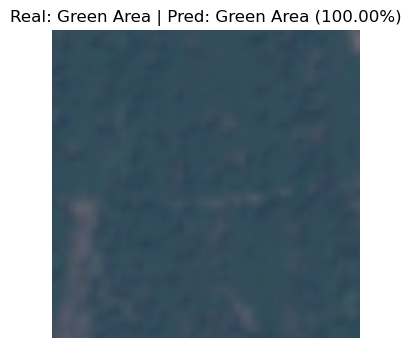

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

def mostrar_prediccion(modelo, dataset, device):
    # Select a random sample
    idx = np.random.randint(len(dataset))
    imagen, etiqueta_real = dataset[idx]
    
    # Prepare the image to be introduced in the model
    imagen_input = imagen.unsqueeze(0).to(device)
    
    # Predict
    modelo.eval()
    with torch.no_grad():
        output = modelo(imagen_input)
        probabilidades = F.softmax(output, dim=1)
        prob_max, pred = torch.max(probabilidades, 1)
        prob_max = prob_max.item()  # Convert into Float
        pred = pred.item()  # Convert into INT
    
    # Dictionary of classes
    class_names = {
        0: 'Cloudy',
        1: 'Desert',
        2: 'Green Area',
        3: 'Water'
    }
    
    # Remove the normalization of the image to visualize it.
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    imagen_mostrar = imagen.clone().detach().cpu() * std + mean
    imagen_mostrar = torch.clamp(imagen_mostrar, 0, 1)  # Asegurar rango [0,1]
    
    # Show the results
    plt.figure(figsize=(8, 4))
    plt.imshow(imagen_mostrar.permute(1, 2, 0))
    plt.title(f"Real: {class_names.get(etiqueta_real, 'Unknown')} | Pred: {class_names.get(pred, 'Unknown')} ({prob_max:.2%})")
    plt.axis('off')
    plt.show()

# Call the function
mostrar_prediccion(my_model, val_data, device)

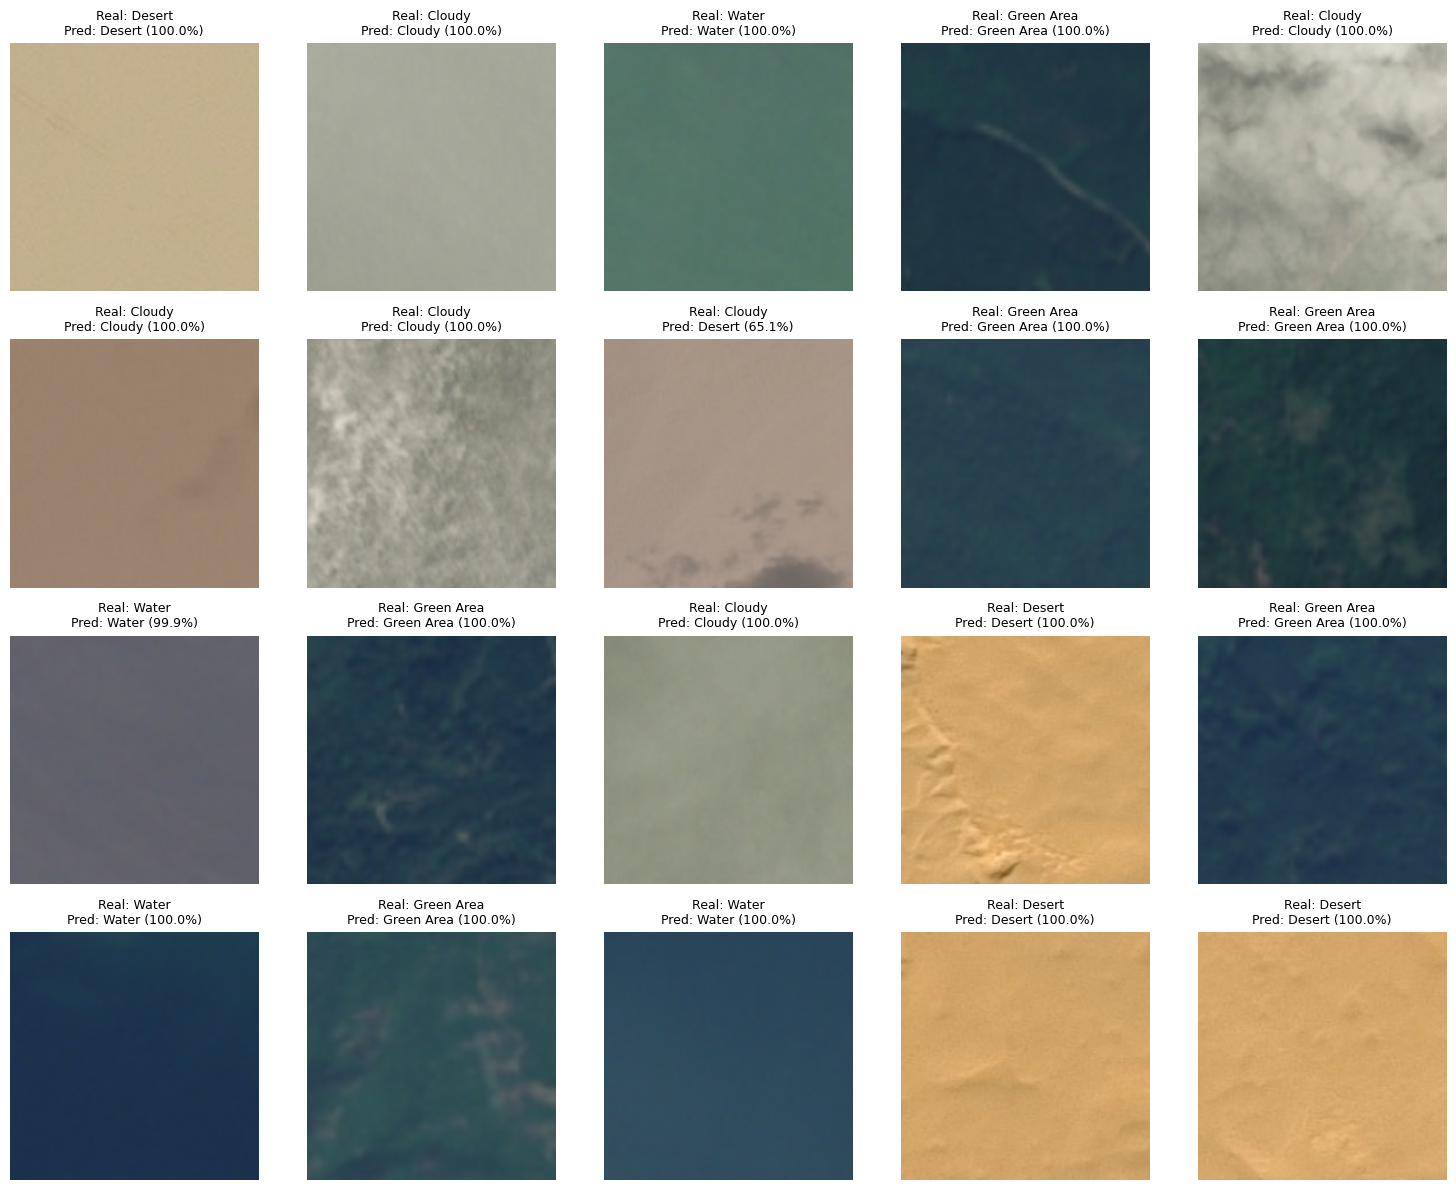

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

def mostrar_predicciones(modelo, dataset, device, n_images=20):
    # Configure the image
    rows = 4
    cols = 5
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    
    # Dictionary of the classes
    class_names = {
        0: 'Cloudy',
        1: 'Desert',
        2: 'Green Area',
        3: 'Water'
    }
    
    # Params of normalisation
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    
    for i in range(n_images):
        # Selecting some random samples
        idx = np.random.randint(len(dataset))
        imagen, etiqueta_real = dataset[idx]
        
        # Predict
        with torch.no_grad():
            output = modelo(imagen.unsqueeze(0).to(device))
            prob, pred = torch.max(F.softmax(output, dim=1), 1)
            prob = prob.item()
            pred = pred.item()
        
        # Remove the normalisation
        img_show = imagen.cpu() * std + mean
        img_show = torch.clamp(img_show, 0, 1)
        
        # Show each image with its prediction
        ax = axes[i//cols, i%cols]
        ax.imshow(img_show.permute(1, 2, 0))
        ax.set_title(f"Real: {class_names[etiqueta_real]}\nPred: {class_names[pred]} ({prob:.1%})", 
                    fontsize=9)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function
mostrar_predicciones(my_model, val_data, device, n_images=20)

In [11]:
# Rebuild the architecture
N_CLASSES = 4

loaded_model = nn.Sequential(
    models.mobilenet_v2(pretrained=False),  # Same base
    nn.Dropout(0.3),
    nn.Linear(1000, N_CLASSES)              # Same classifier
)

# Load weights
loaded_model.load_state_dict(torch.load('model.pth'))
loaded_model.eval()

C:\Users\34651\AppData\Local\Temp\ipykernel_16680\2016285320.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('model.pth'))


Sequential(
  (0): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), s

In [11]:
# Move the loaded model to GPU
loaded_model = loaded_model.to(device)

In [112]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.3/39.5 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.8/39.5 MB 3.6 MB/s eta 0:00:11
   -- ------------------------------------- 2.6/39.5 MB 3.4 MB/s eta 0:00:11
   --- ------------------------------------ 3.7/39.5 MB 3.8 MB/s eta 0:00:10
   ---- ----------------------------------- 4.5/39.5 MB 3.9 MB/s eta 0:00:10
   ----- ---------------------------------- 5.5/39.5 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.3/39.5 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/39.5 MB 4.0 MB/s eta 0:00:08
   -------- ------------------------------- 8.1/39.5 MB 4.1 MB/s eta 0:00:08
   --------- ------------------------------ 9.2/39.5 MB 4.1 MB/s eta 0:00:08
   ---------- ----------------------------- 10.2/39.5 MB 4.2 MB/s eta 0:00:07
   --

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import transforms
from PIL import Image

# Function that splits an image passed as an argument into small squares. Each square will
# be used as an image to test the model. The model will provide a prediction for each of 
# the small squares (small images) into which the original image is divided.
def segment_image(image_path, model, window_size=32, stride=32):
    # Load the image, retrieves the image's heght and width and make a copy 
    # of the original image to draw the prediction on.
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    output_image = image.copy()

    # Converts the image to PIL image, resizes it and conver it to a PyTorch tensor, to
    # pass it to the model.
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    # Colors and names of the classes
    colors = {
        0: (0, 255, 0),        # Green Area
        1: (255, 255, 0),        # Water
        2: (128, 128, 128),    # Cloudy
        3: (0, 0, 255),      # Desert
    }

    class_names = {
        0: "Green Area",
        1: "Water",
        2: "Cloudy",
        3: "Desert"
    }

    # Dividing the images into small squares using a sliding window approach
    # Iterate over the image in steps (stride) and extracts square patches of size = window_size
    # Transform each patch and sends it to the model for prediction
    for y in range(0, h - window_size, stride):
        for x in range(0, w - window_size, stride):
            crop = image[y:y+window_size, x:x+window_size]
            tensor_crop = transform(crop).unsqueeze(0).to(device) # Pass the image to GPU, it is neccesary because the model is also in GPU

            with torch.no_grad():
                output = model(tensor_crop)
                predicted_class = torch.argmax(output).item() # Make a prediction

            # Draw a rectangle around each "small image". each small patch is located and using a 
            #color that corresponds to the model's prediction for that patch. 
            cv2.rectangle(output_image, (x, y), (x+window_size, y+window_size), colors[predicted_class], 2)

    # Create the legend outside the image
    legend_width = 200
    legend = np.ones((h, legend_width, 3), dtype=np.uint8) * 255 

    # Draws a small colored box and label for each class in the legend.
    y_offset = 30
    for class_id, name in class_names.items():
        color = colors[class_id]
        cv2.rectangle(legend, (10, y_offset), (30, y_offset + 20), color, -1)
        cv2.putText(legend, name, (40, y_offset + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)
        y_offset += 40

    # Combine the segmented image and the legend
    combined = np.hstack((output_image, legend))

    # Show the result
    cv2.imshow("Segmented Image with Legend", combined)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Call the function
segment_image(
    r"C:\Users\34651\Desktop\MASTER\Modulo 9 (Deep Learning con CPU'S)\Challenge\data_images\nubes.webp",
    loaded_model
)


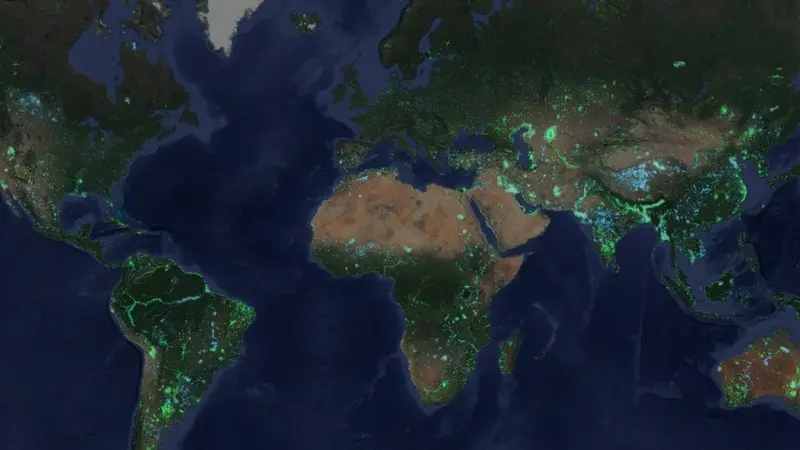
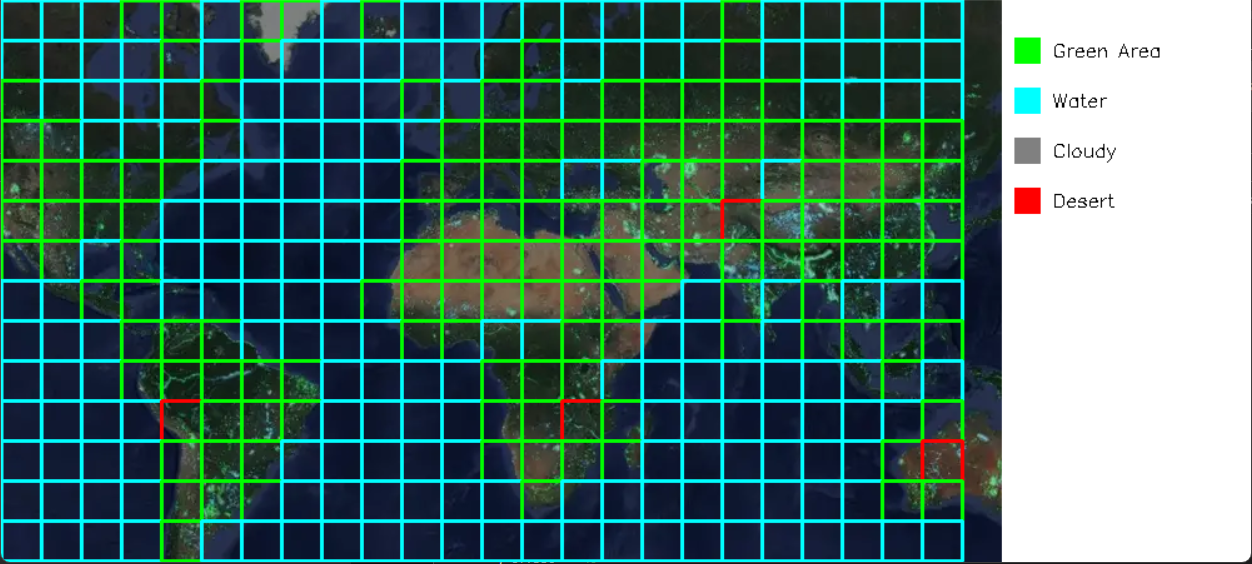
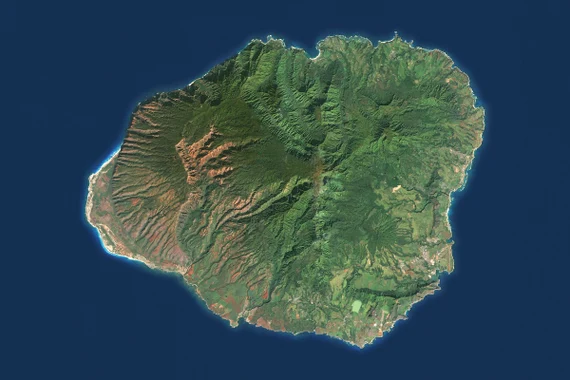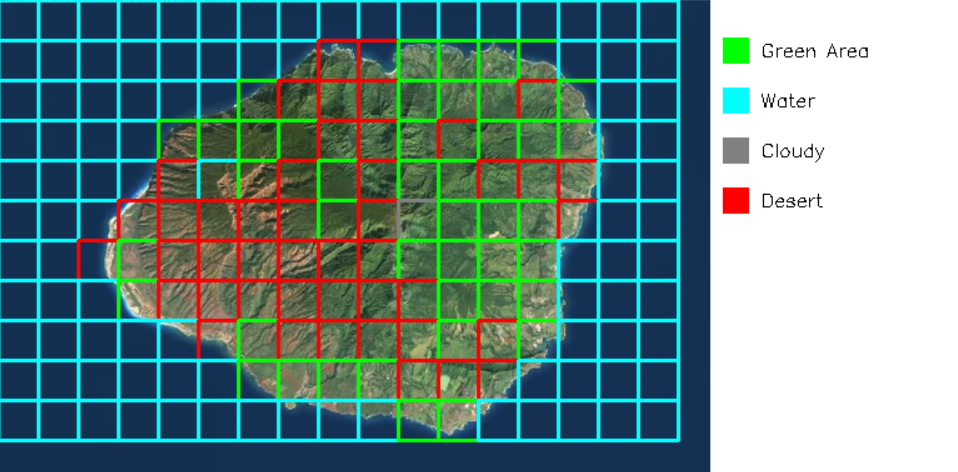
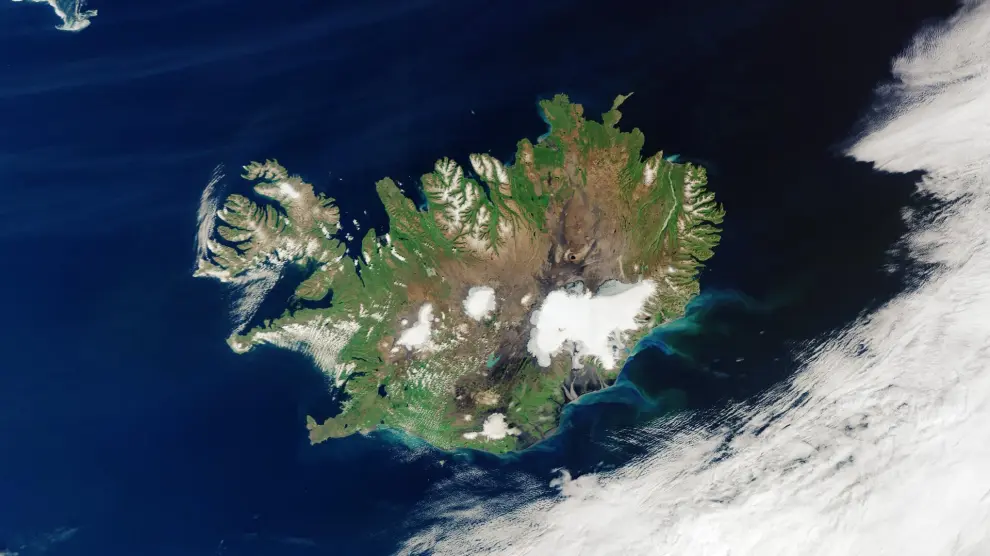
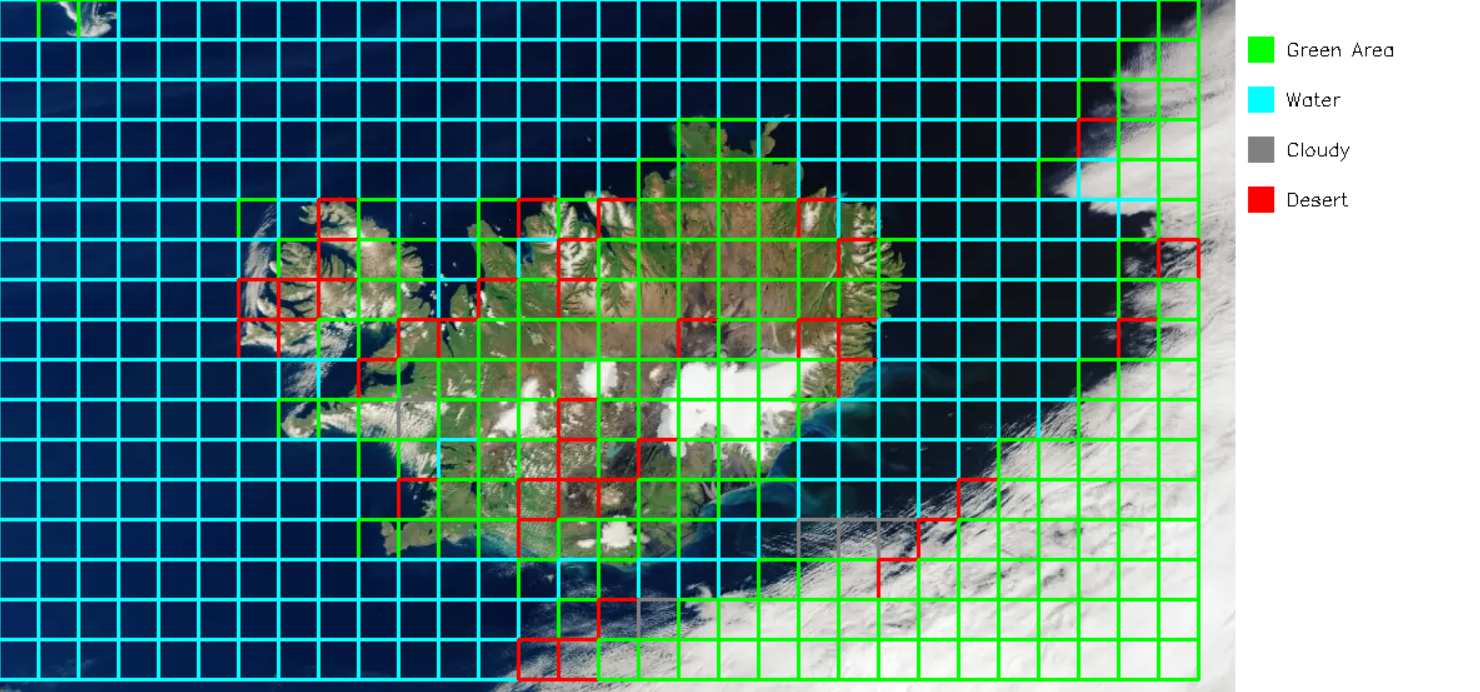

### By analyzing the previous images, the following conclusions can be drawn:

#### 1.- In areas where there is water, the model is able to distinguish it almost perfectly from other regions/classes.

#### 2.- The model is not able to clearly distinguish between desert and green areas. However, it is quite effective at differentiating between green areas and water, achieving an almost perfect separation.

#### 3.- The model does not perform well when clouds are present in the images; it often confuses them with green areas. In general, it almost never detects clouds correctly.

#### 4.- The images used for the "image segmentation" task were not taken from the same dataset used to train the model. That is, the model was trained on a specific dataset of labeled images, but the images tested in this final part of the study were taken from various sources on the internet. As a result, the satellite that captured the training images is different from the satellites that took these last three test images. This affects the results because the resolution, zoom level, and color filters used vary between satellites. Despite this, and even though the new images are completely different from the training dataset, when they are divided into small patches, the model is still able to correctly classify a large number of them as desert, water, green area, or clouds.

#### 5.- It’s possible that if we had made better use of data augmentation, for example, by altering the colors of the training images, and had retrained the model, it might have learned to better differentiate between the different classes regardless of the image quality or the satellite that captured the image. However, the main objective was for the model to be able to predict the images from the test dataset, which it managed to do successfully. It’s true that when extending the analysis to image segmentation, the model’s performance drops a bit, but that’s understandable since it wasn’t originally designed or trained for that type of task.